<a href="https://colab.research.google.com/github/abedulla-ElSaidy/Capstone_Project-2-/blob/main/Surface_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Surface prediction**

*ABEDULLA M ELSAIDY 2023*

In [61]:
# Sample surface 500 points
import pandas as pd
import numpy as np

# Set the seed for reproducibility
np.random.seed(42)

# Create an empty DataFrame
df = pd.DataFrame(columns=['x', 'y', 'z'])


# Generate random values for x and y
df['x'] = np.random.randint(0.1, 100, size=500)
df['y'] = np.random.randint(0.1, 100, size=500)

# Define the modified sinc function + noise
def modified_sinc(x, y):
                return np.sinc((x-20)/100*3.14) + np.sinc((y-50)/100*3.14)+np.random.uniform(2, 2.5)

# Apply the function to calculate z
df['z'] = df.apply(lambda row: modified_sinc(row['x'], row['y']), axis=1)

# Print the DataFrame
df.head()



,x,y,z
0,51,75,2.57
1,92,25,2.73
2,14,15,3.07
3,71,50,2.88
4,60,85,1.87


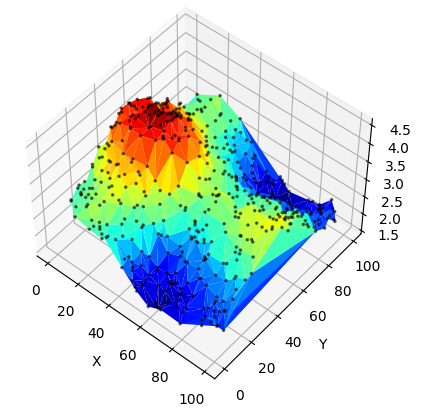

In [62]:
# 3D Graph
### https://www.fabrizioguerrieri.com/
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D
triang = mtri.Triangulation(df['x'], df['y'])
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_trisurf(triang, df['z'], cmap='jet')
ax.scatter(df['x'], df['y'], df['z'], marker='.', s=10, c="black", alpha=0.5)
ax.view_init(elev=50, azim=-50)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [ ]:
%pip install lazypredict


In [64]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [65]:
XX =  df.drop(["z"], axis=1)
YY = df["z"]
X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size=0.2, random_state =55)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:07<00:00,  5.51it/s]


In [102]:
new_df = pd.DataFrame(models)
new_df = new_df.reset_index(drop=False)
new_df

,Model,Adjusted R-Squared,R-Squared,RMSE,Time Taken
0,NuSVR,0.94,0.94,0.16,0.03
1,SVR,0.93,0.94,0.16,0.03
2,HistGradientBoostingRegressor,0.93,0.93,0.16,0.18
3,LGBMRegressor,0.92,0.92,0.17,0.31
4,GradientBoostingRegressor,0.92,0.92,0.17,0.16
5,ExtraTreesRegressor,0.91,0.92,0.18,0.13
6,KNeighborsRegressor,0.91,0.91,0.19,0.01
7,XGBRegressor,0.90,0.90,0.20,1.27
8,RandomForestRegressor,0.90,0.90,0.20,0.28
9,BaggingRegressor,0.88,0.88,0.22,0.03


In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

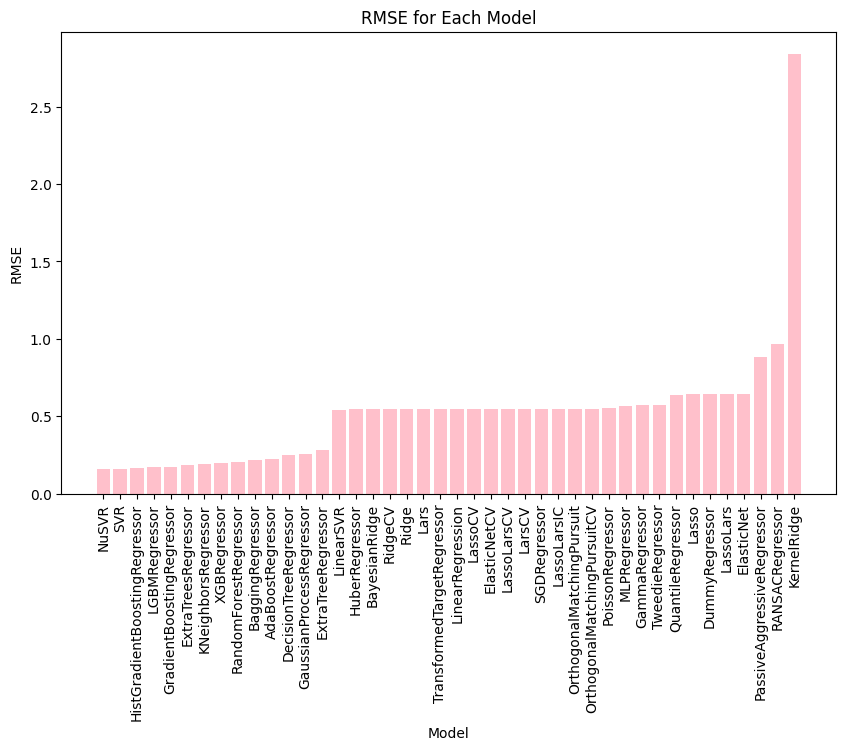

In [124]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(new_df['Model'], new_df['RMSE'], color="Pink")

plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE for Each Model')
plt.xticks(rotation=90)

plt.show()


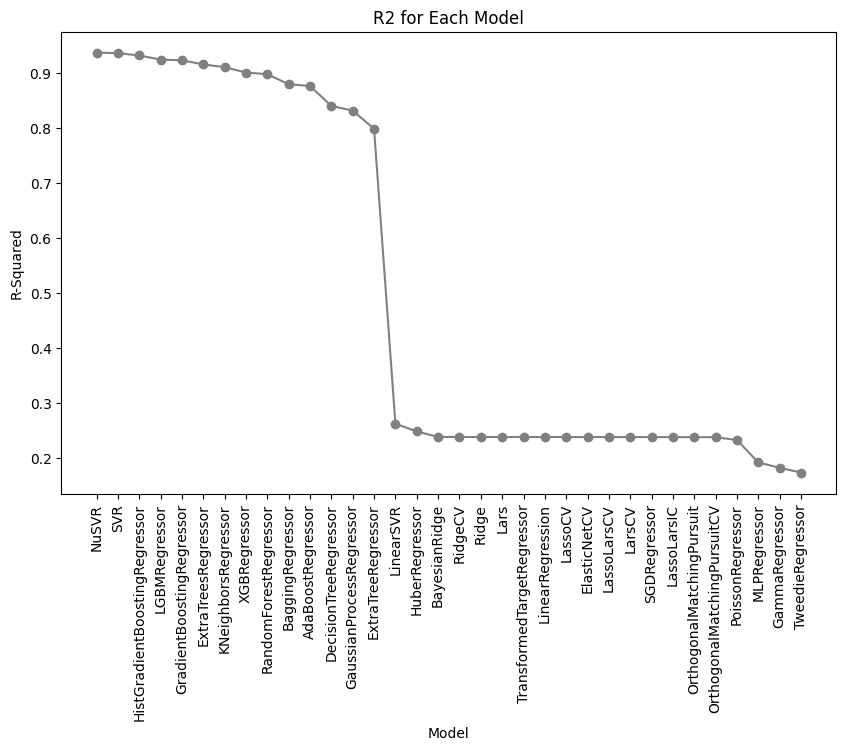

In [123]:
plt.figure(figsize=(10, 6))
plt.plot(new_df[new_df['R-Squared'] > 0]['Model'], new_df[new_df['R-Squared'] > 0]['R-Squared'], marker='o', color='grey')

plt.xlabel('Model')
plt.ylabel('R-Squared')
plt.title('R2 for Each Model')
plt.xticks(rotation=90)
plt.show()
